In [60]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier

### Task 2 - Random Forest Classifier

In [61]:
# Set random seed for reproducibility
np.random.seed(42)

# Load data
train_df = pd.read_csv("Customer_train.csv")
test_df = pd.read_csv("Customer_test.csv")
# Preprocess data
def preprocess_data(df):
    # Handle missing values
    imputer_mean = SimpleImputer(strategy='mean')
    imputer_freq = SimpleImputer(strategy='most_frequent')
    
    numerical_cols = ['Age', 'Work_Experience', 'Family_Size']
    categorical_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
    
    df[numerical_cols] = imputer_mean.fit_transform(df[numerical_cols])
    df[categorical_cols] = imputer_freq.fit_transform(df[categorical_cols])
    
    # One-hot encoding
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    # Standardize numerical features
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    
    return df

train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

# Separate features and target variable
X_train = train_df.drop(columns=['Segmentation'])
y_train = train_df['Segmentation']
X_test = test_df

In [62]:
# Define RandomForestClassifier
class RandomForestClassifier:
    def __init__(self, n_iter):
        self.n_iter = n_iter
        self.trees = []
    
    def bootstrap(self, X, y):
        n_samples = X.shape[0]
        idx = np.random.choice(n_samples, n_samples, replace=True)
        return X[idx], y[idx]
    
    def fit(self, X_train, y_train):
        for _ in range(self.n_iter):
            X, y = self.bootstrap(X_train, y_train)
            tree = DecisionTreeClassifier(criterion="entropy", splitter="best", max_features="sqrt", random_state=42)
            tree.fit(X, y)
            self.trees.append(tree)
    
    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        pred = []
        for col_idx in range(tree_preds.shape[1]):
            unique_values, counts = np.unique(tree_preds[:, col_idx], return_counts=True)
            mode_index = np.argmax(counts)
            pred.append(unique_values[mode_index])
        return pred
    
# Train-Test Split
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train Model
n_values = np.arange(5, 51, 5)
accuracy = []

for n in n_values:
    classifier = RandomForestClassifier(n)
    classifier.fit(X_train_split.values, y_train_split.values)
    pred = classifier.predict(X_val.values)
    accuracy.append(accuracy_score(y_val, pred))


### Best number of Decision Trees

Best number of decision trees: 50


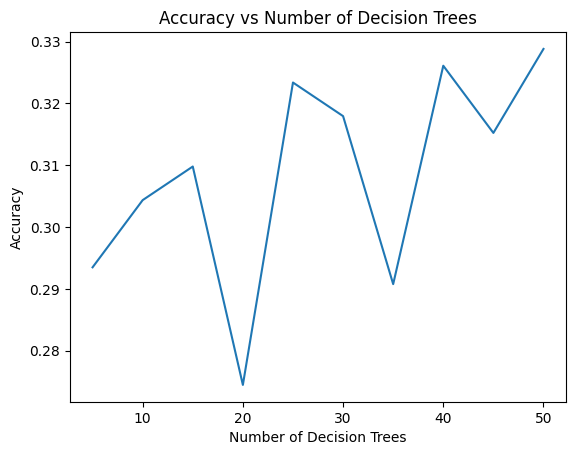

In [63]:
# Best number of decision trees
n_max = n_values[np.argmax(accuracy)]
print(f"Best number of decision trees: {n_max}")

# Plot Accuracy vs Number of Decision Trees
plt.plot(n_values, accuracy)
plt.xlabel("Number of Decision Trees")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Decision Trees")
plt.show()

# Train final model with best number of decision trees
classifier = RandomForestClassifier(n_max)
classifier.fit(X_train_split.values, y_train_split.values)
pred = classifier.predict(X_val.values)


### Random Forest Classifier Metrics

In [64]:
print("Random Forest Classifier Metrics: ")
# Evaluate Model
print("Accuracy:", accuracy_score(y_val, pred))
print("Precision:", precision_score(y_val, pred, average="weighted"))
print("Recall:", recall_score(y_val, pred, average="weighted"))
print("f1 Score: ", f1_score(y_val, pred, average="weighted"))


Random Forest Classifier Metrics: 
Accuracy: 0.3233695652173913
Precision: 0.31975451276258043
Recall: 0.3233695652173913
f1 Score:  0.3186831414590163


### Confusion Matrix

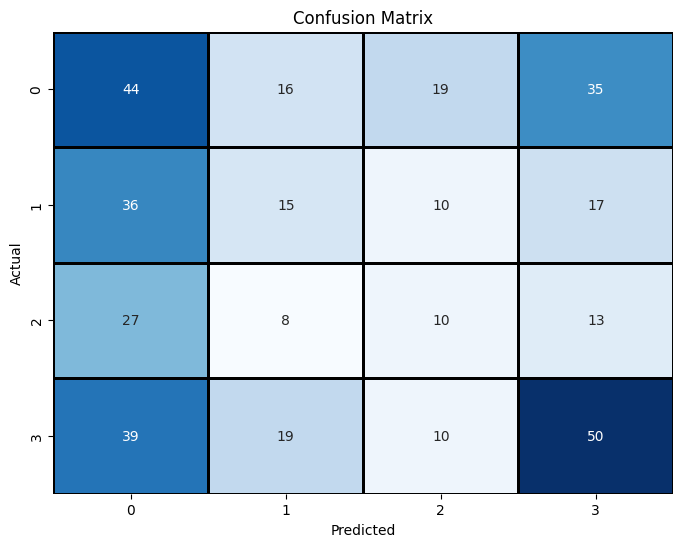

In [65]:
# Confusion Matrix
cm = confusion_matrix(y_val, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=1, linecolor="k", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### Predictions on Test Data

In [66]:
print("predicted")
# Predict on Test Data
test_pred = classifier.predict(X_test.values)
# Print test predictions in a column format
for i, pred in enumerate(test_pred):
    print(f"{pred}")

predicted
D
A
B
A
A
D
A
A
B
A
B
C
D
A
D
D
C
D
A
B
B
B
B
C
A
A
A
A
A
A
C
D
B
C
B
B
B
A
A
A
A
D
B
A
D
C
A
C
C
A
D
B
D
B
D
A
C
A
A
B
D
A
B
B
D
A
B
B
B
A
A
B
C
A
D
C
A
D
D
A
C
D
C
D
D
A
A
D
A
B
B
B
C
A
A
D
D
D
A
D
A
A
B
C
A
A
D
A
A
A
B
C
A
A
C
A
A
A
D
B
D
C
D
C
A
C
B
B
D
A
A
A
A
A
A
D
B
A
A
A
B
A
B
A
A
B
D
B
A
C
A
B
A
D
D
D
B
A
D
D
D
A
A
D
B
C
C
D
A
A
D
A
B
D
A
D
D
A
A
B
A
D
D
A
A
A
A
D
A
C
A
A
D
B
A
D
D
A
B
B
C
C
A
A
A
A
B
A
A
D
B
D
D
A
B
A
A
A
D
C
A
D
A
D
B
B
D
A
B
A
B
A
A
C
D
A
A
D
A
B
A
D
A
D
D
D
C
A
A
D
A
C
A
C
D
A
A
B
B
D
A
D
C
C
D
A
A
B
D
A
D
B
D
D
D
A
B
A
B
A
D
A
A
D
D
A
A
A
D
B
A
B
A
B
D
D
D
A
A
D
D
D
D
B
A
A
B
D
C
A
C
D
A
D
B
D
A
A
D
A
D
A
A
B
D
B
A
D
D
D
A
A
A
C
C
D
D
B
B
A
C
A
A
A
C
D
B
A
C
D
D
A
D
A
C
B
A
C
A
D
A
C
A
A
A
D
A
B
C
D
C
D
D
A
A
A
A
A
C
B
A
A
A
A
B
B
A
B
A
C
B
A
D
B
A
A
A
A
B
A
C
A
A
B
A
B
A
D
A
B
C
B
D
D
A
B
A
A
A
D
B
C
A
A
D
B
A
D
D
B
B
C
D
B
B
A
B
D
A
B
D
A
D
A
D
A
B
A
A
A
B
A
A
B
A
D
A
B
A
B
A
D
C
A
A
B
C
C
A
D
A
A
C
A
A
A
D
A
D
A
A
D
A
D
A
D
D
A
A
A
A
C
D
A
B
